In [1]:
"""
Author: Masafumi Endo
Date: 10/10/2019
Python Version: 3.6
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ************************* (a) *************************

# Load training .csv data
df = pd.read_csv('../data/PA1_train.csv')
# Remove ID feature as written in the assignment, and also dummy features
x_train = df.drop(['dummy', 'id', 'price'], axis=1)
y_train = df.loc[:, 'price']

# ************************* (a) *************************

In [3]:
# ************************* (b) *************************

x_train_datetime = pd.to_datetime(x_train['date'], infer_datetime_format=True)
x_train_year, x_train_month, x_train_day = x_train_datetime.dt.year, x_train_datetime.dt.month, x_train_datetime.dt.day
x_train_date = pd.DataFrame({'year': x_train_year, 'month': x_train_month, 'day': x_train_day})
x_train = x_train.drop(['date'], axis=1)
x_train = pd.concat([x_train_date, x_train], axis=1)

# ************************* (b) *************************

In [4]:
# ************************* (c) *************************

# Compute mean and standard deviation
x_mean = x_train.mean()
x_std = x_train.std()
# Compuate range by subtracting minimum value from maximum value
x_range = x_train.max() - x_train.min()

# Create table of mean, std, and range value
x_train_static = pd.DataFrame({'mean': x_mean, 'std': x_std, 'range': x_range})
x_train_static = x_train_static.drop(['waterfront', 'grade', 'condition'])

# Extract waterfront, grade, and condition features
x_train_wf = x_train.loc[:, 'waterfront']
x_train_grade = x_train.loc[:, 'grade']
x_train_cd = x_train.loc[:, 'condition']

# Compute the percentage of categories in waterfront, grade, and condition features (If normalize=False, we can see the number of categories)
count_wf = x_train_wf.value_counts(normalize=True)
count_grade = x_train_grade.value_counts(normalize=True)
count_cd = x_train_cd.value_counts(normalize=True)

# ************************* (c) *************************

In [5]:
# ************************* (d) *************************

# Part 0, (d) is skipped since the question mainly needs (c) procedure

# ************************* (d) *************************

In [6]:
# ************************* (e) *************************

# Normalize features between 0 and 1
x_train_normalized = (x_train - x_train.min()) / (x_train.max() - x_train.min())

# ************************* (e) *************************

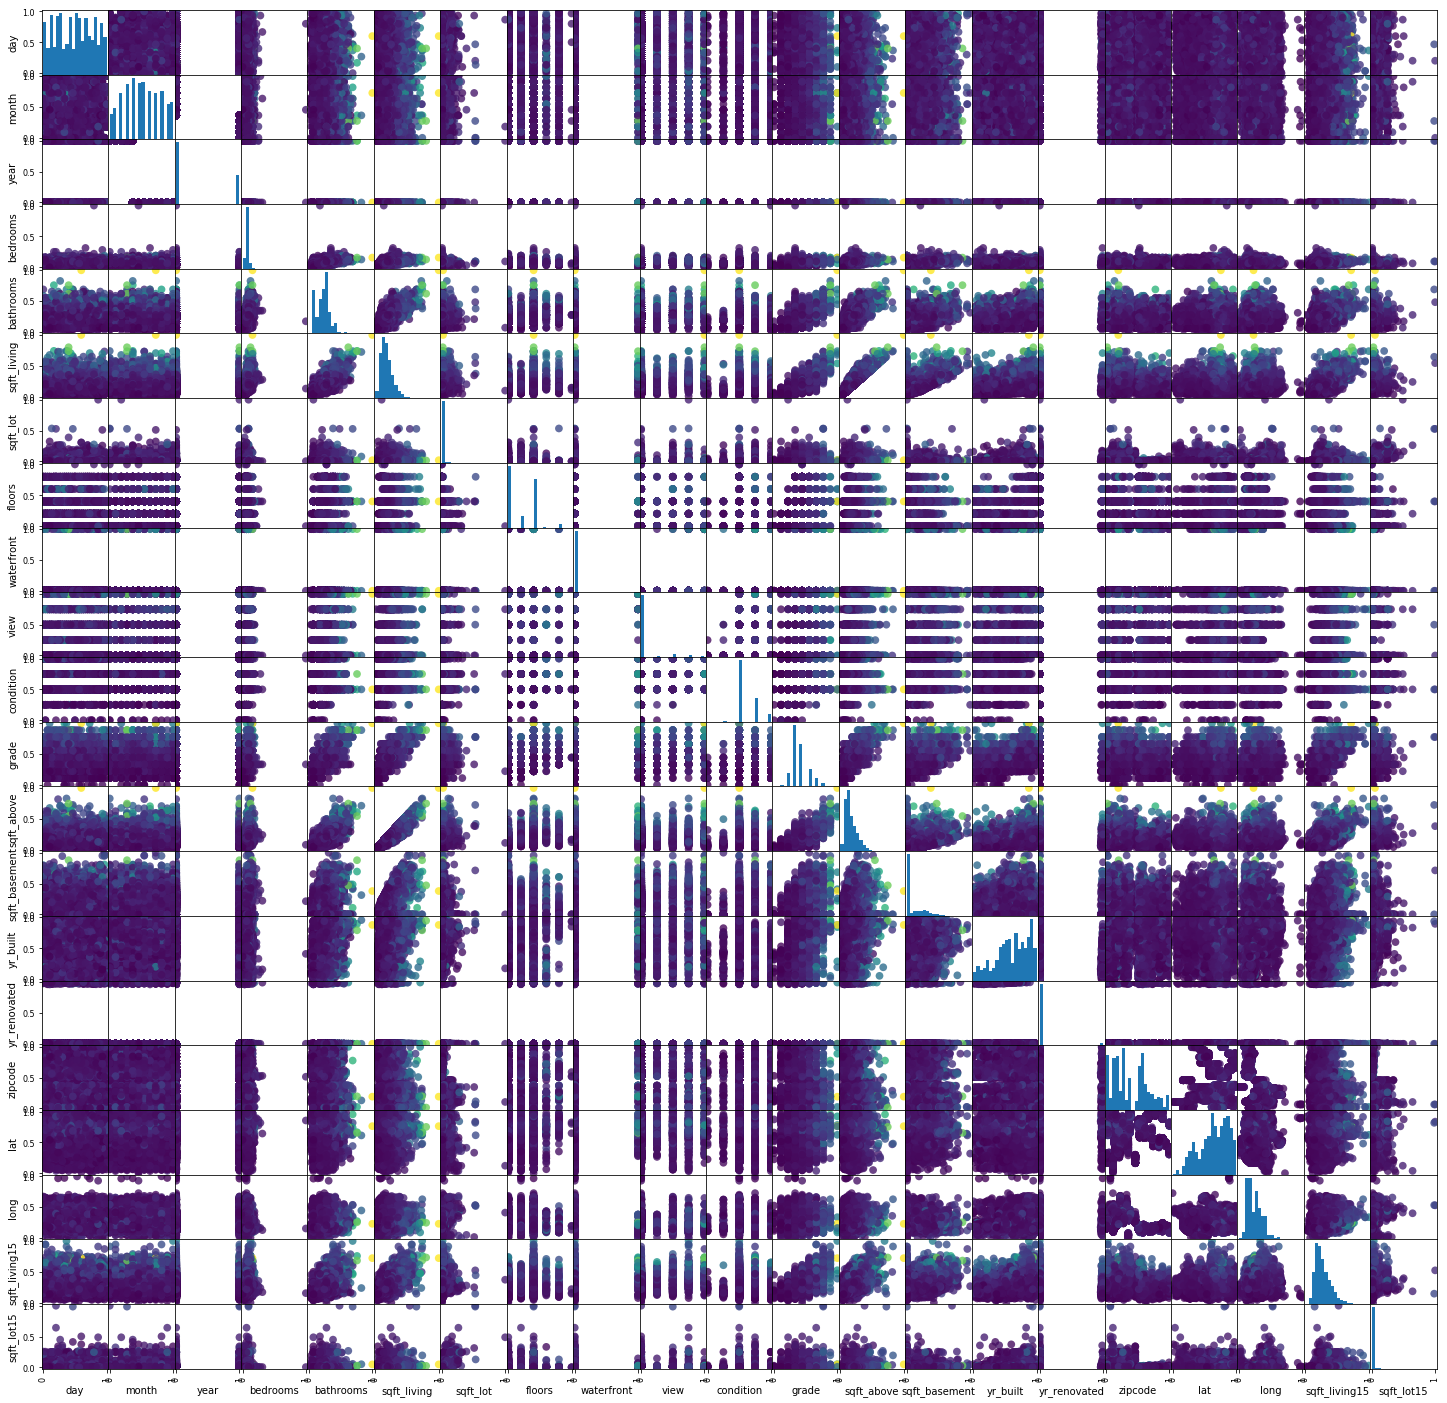

In [7]:
# Visualize input features
plt = pd.plotting.scatter_matrix(x_train_normalized, c=y_train, figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)